In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# 1.Tiền xử lí

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/khaipha/Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.shape

(9994, 21)

In [ ]:
# Thống kê tóm tắt cho các cột số
df.describe()
# Số lượng duy nhất cho các cột danh mục
df.select_dtypes(include='object').nunique()



,0
Order ID,5009
Order Date,1237
Ship Date,1334
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531
State,49


##Kiểm tra các dữ liệu bị thiếu và trùng lặp

In [ ]:
# Kiểm tra các giá trị bị thiếu
df.isnull().sum()

# Kiểm tra các giá trị trùng lặp
df.duplicated().sum()

np.int64(0)

In [ ]:
df.select_dtypes(include='object').nunique()

,0
Order ID,5009
Order Date,1237
Ship Date,1334
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531
State,49


## Kiểm tra và xử lí ngoại lai

In [ ]:
# Phát hiện giá trị ngoại lai (outlier) trong cột 'Sales' bằng phương pháp IQR

Q1 = df['Sales'].quantile(0.25)    # Tính giá trị phần tư thứ nhất (Q1)
Q3 = df['Sales'].quantile(0.75)    # Tính giá trị phần tư thứ ba (Q3)
IQR = Q3 - Q1                            # Tính khoảng tứ phân vị (IQR = Q3 - Q1)

nguong_duoi = Q1 - 1.5 * IQR             # Ngưỡng dưới để phát hiện ngoại lai
nguong_tren = Q3 + 1.5 * IQR             # Ngưỡng trên để phát hiện ngoại lai

# Lọc ra các dòng có giá trị 'JoiningYear' nằm ngoài khoảng (nguong_duoi, nguong_tren)
loc = df[(df['Sales'] < nguong_duoi) | (df['Sales'] > nguong_tren)]
print("Số lượng ngoại lai: ", len(loc))  # Hiển thị các dòng bị coi là ngoại lai

Số lượng ngoại lai:  1167


Text(0.5, 1.0, 'Sales trước khi xử lý')

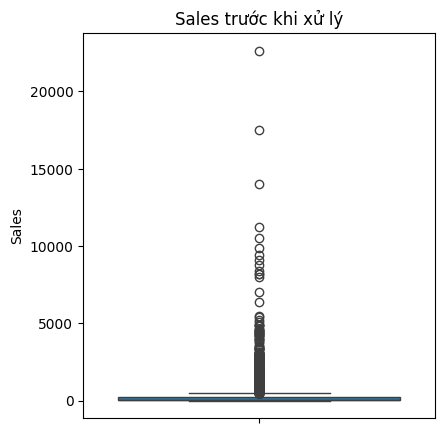

In [ ]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales'])
plt.title("Sales trước khi xử lý")

In [ ]:
df['Sales'] = df['Sales'].clip(nguong_duoi, nguong_tren)

Text(0.5, 1.0, 'Sales sau khi xử lý')

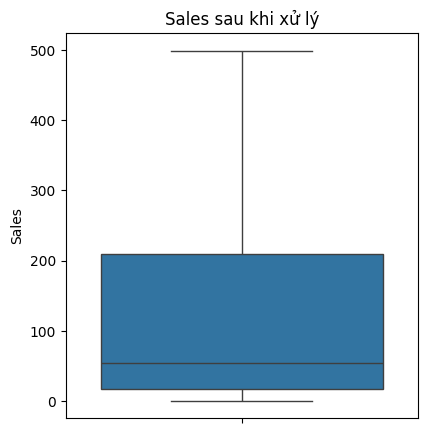

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Sales'])
plt.title("Sales sau khi xử lý")

In [ ]:
# Phát hiện giá trị ngoại lai (outlier) trong cột 'Quantity' bằng phương pháp IQR

Q1 = df['Quantity'].quantile(0.25)    # Tính giá trị phần tư thứ nhất (Q1)
Q3 = df['Quantity'].quantile(0.75)    # Tính giá trị phần tư thứ ba (Q3)
IQR = Q3 - Q1                            # Tính khoảng tứ phân vị (IQR = Q3 - Q1)

nguong_duoi = Q1 - 1.5 * IQR             # Ngưỡng dưới để phát hiện ngoại lai
nguong_tren = Q3 + 1.5 * IQR             # Ngưỡng trên để phát hiện ngoại lai

# Lọc ra các dòng có giá trị 'JoiningYear' nằm ngoài khoảng (nguong_duoi, nguong_tren)
loc = df[(df['Quantity'] < nguong_duoi) | (df['Quantity'] > nguong_tren)]
print("Số lượng ngoại lai: ", len(loc))  # Hiển thị các dòng bị coi là ngoại lai

Số lượng ngoại lai:  170


Text(0.5, 1.0, 'Quantity trước khi xử lý')

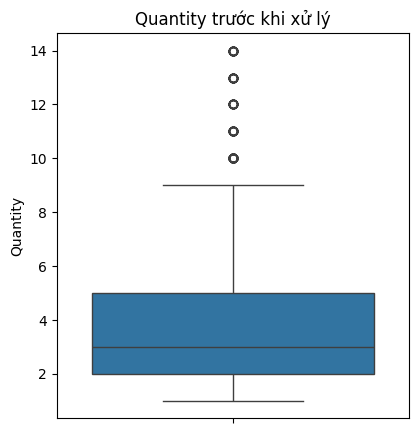

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title("Quantity trước khi xử lý")

In [ ]:
df['Quantity'] = df['Quantity'].clip(nguong_duoi, nguong_tren)

Text(0.5, 1.0, 'Quantity sau khi xử lý')

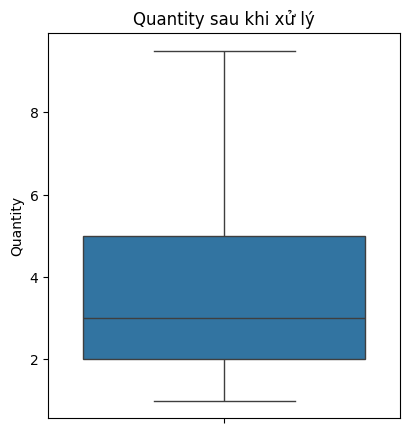

In [ ]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Quantity'])
plt.title("Quantity sau khi xử lý")

In [ ]:
# Phát hiện giá trị ngoại lai (outlier) trong cột 'Discount' bằng phương pháp IQR

Q1 = df['Discount'].quantile(0.25)    # Tính giá trị phần tư thứ nhất (Q1)
Q3 = df['Discount'].quantile(0.75)    # Tính giá trị phần tư thứ ba (Q3)
IQR = Q3 - Q1                            # Tính khoảng tứ phân vị (IQR = Q3 - Q1)

nguong_duoi = Q1 - 1.5 * IQR             # Ngưỡng dưới để phát hiện ngoại lai
nguong_tren = Q3 + 1.5 * IQR             # Ngưỡng trên để phát hiện ngoại lai

# Lọc ra các dòng có giá trị 'JoiningYear' nằm ngoài khoảng (nguong_duoi, nguong_tren)
loc = df[(df['Discount'] < nguong_duoi) | (df['Discount'] > nguong_tren)]
print("Số lượng ngoại lai: ", len(loc))  # Hiển thị các dòng bị coi là ngoại lai

Số lượng ngoại lai:  856


Text(0.5, 1.0, 'Discount trước khi xử lý')

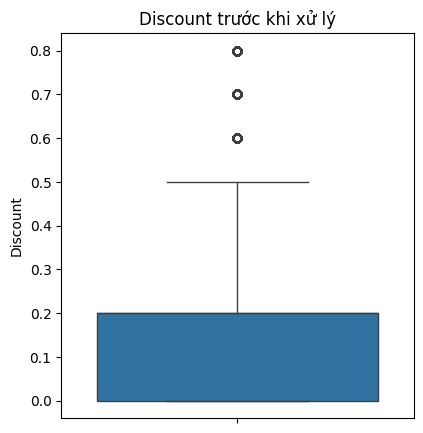

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Discount'])
plt.title("Discount trước khi xử lý")

In [ ]:
df['Discount'] = df['Discount'].clip(nguong_duoi, nguong_tren)

Text(0.5, 1.0, 'Discount sau khi xử lý')

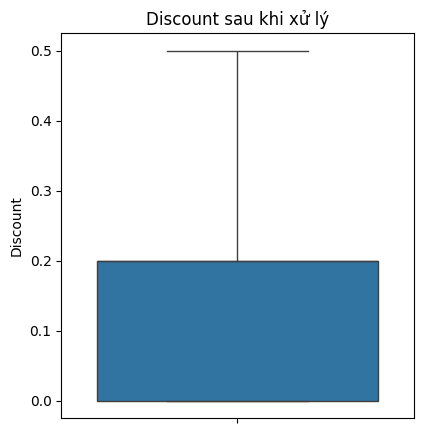

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Discount'])
plt.title("Discount sau khi xử lý")

Text(0.5, 1.0, 'Biểu đồ Profit')

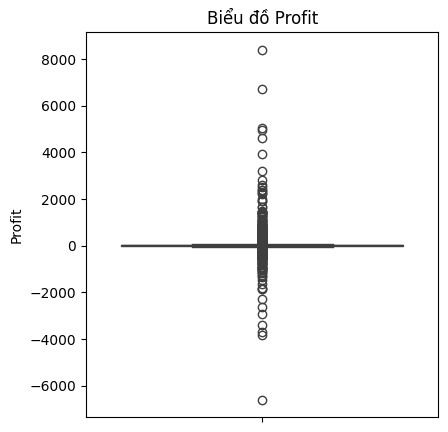

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Profit'])
plt.title("Biểu đồ Profit")

Sau khi xử lí ngoại lai bằng boxplot cho thấy biến Sales chủ yếu phân bố quanh giá trị ~500. Ngược lại, biến Profit xuất hiện một số giá trị cực lớn và cực nhỏ  làm méo trục đồ thị, che khuất phần phân phối chính. Vì mục tiêu tại bước EDA là trực quan hóa xu hướng trung tâm mà không làm thay đổi dữ liệu gốc, nên khi vẽ biểu đồ Sales–Profit tôi tạm thời lọc các điểm có |Profit| >500 chỉ cho mục đích hiển thị. Việc này giúp nhận diện xu hướng chung giữa Sales và Profit mà không xóa các bản ghi khỏi bộ dữ liệu thực tế

## Chuẩn hóa dữ liệu

In [ ]:
#chuyển hai cột 'Row ID' và 'Postal Code' sang kiểu dữ liệu object
df['Row ID'] = df['Row ID'].astype('object')
df['Postal Code'] = df['Postal Code'].astype('object')

# 2.Phân tích mô tả

In [ ]:
# Kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   object 
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   object 
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Phân tích tương quan

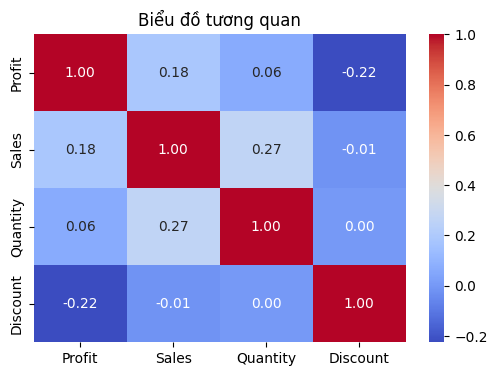

In [ ]:
corr = df[["Profit","Sales", "Quantity", "Discount"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ tương quan')
plt.show()

## Bảng thống kê

In [ ]:
df.describe()


,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,140.281105,3.753352,0.137451,28.656896
std,168.804241,2.102557,0.157680,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,498.930000,9.500000,0.500000,8399.976000


1. Biến Sales (Doanh số)

Giá trị doanh số có mức trung bình 140.28, trong khi trung vị chỉ 54.49, thấp hơn đáng kể so với trung bình. Điều này cho thấy phân phối của biến bị lệch phải, tức phần lớn đơn hàng có doanh số thấp, nhưng tồn tại một số đơn hàng có doanh số rất cao kéo trung bình tăng lên.
Độ lệch chuẩn (168.80) khá lớn so với trung bình, chứng tỏ mức độ biến động mạnh. Khoảng giá trị trải rộng từ 0.44 đến 498.93, phản ánh sự khác biệt lớn giữa các đơn hàng. Dấu hiệu này cho thấy Sales có khả năng chứa ngoại lai và cần được xử lý cẩn thận trong các bước phân tích tiếp theo.

2. Biến Quantity (Số lượng sản phẩm)

Số lượng sản phẩm có trung bình 3.75 và trung vị 3, cho thấy phân phối khá cân bằng. Độ lệch chuẩn 2.10 ở mức vừa phải, phản ánh sự biến động không quá lớn.
Giá trị dao động từ 1 đến 9.5, thể hiện mức độ ổn định và ít khả năng xuất hiện ngoại lai. Đây là một biến khá "sạch" trong bộ dữ liệu.

3. Biến Discount (Mức giảm giá)

Giảm giá trung bình (0.137, tương đương 13.7%) với trung vị 0.20, cho thấy phần lớn đơn hàng đều có mức giảm giá thấp đến trung bình.
Giá trị dao động từ 0 đến 0.50, tức mức giảm tối đa 50%. Độ lệch chuẩn 0.157 cho thấy mức độ phân tán vừa phải. Nhìn chung, biến Discount có tính ổn định và không có dấu hiệu bất thường.

4. Biến Profit (Lợi nhuận)

Lợi nhuận là biến có mức dao động mạnh nhất trong toàn bộ bảng mô tả. Giá trị lợi nhuận trung bình là 28.66, nhưng trung vị chỉ 8.66, cho thấy phân phối bị lệch phải rõ rệt.
Đáng chú ý, giá trị nhỏ nhất lên đến –6599.97, trong khi giá trị lớn nhất lên đến 8399.97, kèm theo độ lệch chuẩn 234.26 rất cao. Điều này cho thấy tồn tại nhiều đơn hàng có mức lãi hoặc lỗ bất thường, phản ánh sự xuất hiện của phần tử ngoại lai mạnh. Biến Profit cần được kiểm tra và xử lý kỹ lưỡng trước khi đưa vào mô hình dự báo.

 Kết luận chung

Sales và Profit là hai biến có biến thiên lớn, phân phối lệch phải và khả năng cao chứa nhiều ngoại lai.

Quantity và Discount có phân phối ổn định hơn, ít khả năng xuất hiện ngoại lai.

Các đặc điểm này là cơ sở quan trọng cho bước EDA tiếp theo, đặc biệt trong việc trực quan hóa dữ liệu và chuẩn bị dữ liệu cho mô hình dự báo lợi nhuận.



## Khám phá dữ liệu

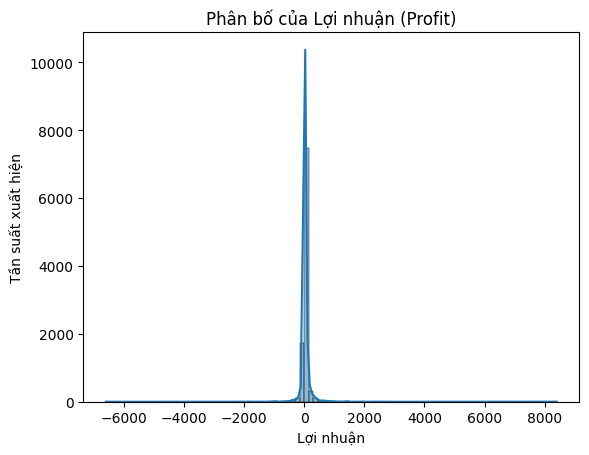

In [ ]:
#Phân bố lợi nhuận
sns.histplot(df['Profit'], bins=100, kde=True)
plt.title('Phân bố của Lợi nhuận (Profit)')
plt.xlabel('Lợi nhuận')
plt.ylabel('Tần suất xuất hiện')
plt.show()

Lợi nhuận thường lệch phải, cho thấy phần lớn các giao dịch có giá trị nhỏ, với một vài giao dịch lớn đáng kể.
Giá trị lợi nhuận có thể âm, cho thấy khoản lỗ trên một số giao dịch.

## Mối quan hệ giữa các biến

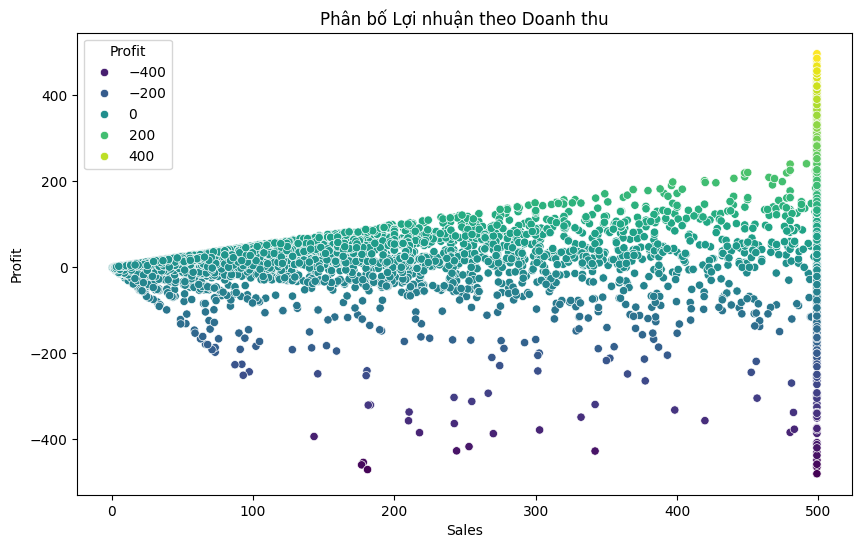

In [ ]:
#Phân bố lợi nhuận theo doanh thu
df_plot = df[(df['Profit'] >= -500) & (df['Profit'] <= 500)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_plot, x='Sales', y='Profit', hue='Profit', palette='viridis')

plt.title("Phân bố Lợi nhuận theo Doanh thu")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


Biểu đồ cho thấy mối quan hệ giữa Sales và Profit có xu hướng không tuyến tính và chịu ảnh hưởng mạnh từ cấu trúc chi phí/chiết khấu hơn là từ doanh thu đơn thuần.

- Ở mức doanh thu thấp (Sales dưới 100)

Lợi nhuận dao động hẹp và chủ yếu quanh mức 0. Điều này cho thấy các giao dịch nhỏ thường mang lại biên lợi nhuận rất thấp, thậm chí không đủ bù chi phí cố định.
→ Các đơn hàng nhỏ không đóng góp nhiều vào lợi nhuận tổng thể.

- Khi doanh thu tăng đến khoảng 150–300

Biên độ lợi nhuận bắt đầu mở rộng:

xuất hiện nhiều đơn hàng lãi cao hơn,

nhưng đồng thời vẫn có một lượng lớn đơn hàng lỗ.

Điều này phản ánh rằng doanh thu cao chưa đảm bảo lợi nhuận cao, vì chiết khấu hoặc margin có thể khác nhau giữa từng nhóm sản phẩm.

- Ở mức doanh thu cao nhất (300–500)

Một xu hướng đáng chú ý là:

phần lớn điểm lợi nhuận dương tập trung ở nhóm doanh thu cao,

nhưng cũng đồng thời xuất hiện các điểm lỗ sâu — chứng tỏ không phải đơn hàng lớn nào cũng hiệu quả.

Điều này cho thấy các giao dịch doanh thu lớn vẫn có rủi ro nếu đi kèm chiết khấu cao hoặc sản phẩm có biên lợi nhuận thấp.
→ Các đơn hàng lớn nhưng lỗ là tín hiệu cần được kiểm tra lại chính sách giá và chi phí.

- Lợi nhuận tăng dần theo Sales nhưng không ổn định

Mặc dù có xu hướng tổng thể là Sales tăng → Profit có xu hướng tăng, nhưng phân tán rất rộng.
Điều này cho thấy:

lợi nhuận bị tác động mạnh bởi các yếu tố khác ngoài doanh thu,

đặc biệt là chiết khấu, loại sản phẩm và chi phí vận hành.



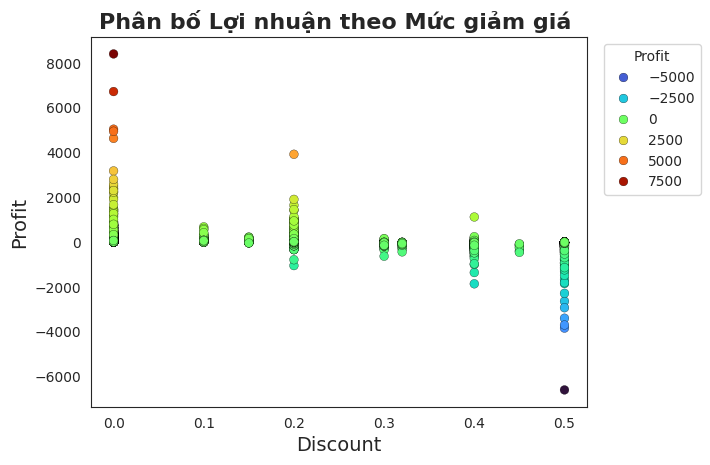

In [ ]:
#Phân bố lợi nhuận theo mức giảm giá
sns.set_style("white")
sns.scatterplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Profit',
    palette='turbo',     # màu đậm, rõ
    s=40,                # tăng kích thước điểm
    edgecolor='black',   # thêm viền cho dễ nhìn
    linewidth=0.2
)

plt.title('Phân bố Lợi nhuận theo Mức giảm giá ',
          fontsize=16, weight='bold')
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Profit', fontsize=14)

plt.legend(title='Profit', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Biểu đồ cho thấy một xu hướng tiêu cực rất rõ ràng: chiết khấu càng cao thì lợi nhuận càng giảm, và khi discount vượt quá 30% thì phần lớn đơn hàng rơi vào trạng thái lỗ.

Ở mức giảm giá 0%, lợi nhuận phân bố khá rộng và xuất hiện nhiều đơn hàng mang lại lợi nhuận cao. Điều này chứng tỏ các giao dịch không giảm giá thường tạo ra biên lợi nhuận tốt và ổn định hơn.

Khi discount tăng lên 0.1 – 0.3, lợi nhuận bắt đầu giảm mạnh; nhiều điểm dữ liệu tụt xuống dưới 0, phản ánh việc chiết khấu đã bào mòn phần lớn biên lợi nhuận dù doanh thu có thể không thay đổi tương ứng.

Đáng lo ngại nhất là mức giảm giá 0.4 – 0.5, nơi phần lớn đơn hàng đều lỗ, thậm chí lỗ rất nặng (profit âm từ 3000 đến hơn 6000). Điều này cho thấy việc áp dụng giảm giá cao không chỉ làm giảm lợi nhuận mà còn tạo rủi ro tài chính trực tiếp.

Nhận định tổng quan:
Một xu hướng tiêu cực rõ ràng đang diễn ra — chiết khấu càng cao, lợi nhuận càng thấp. Điều này chứng tỏ các chương trình giảm giá cao không hiệu quả trong việc tối đa hóa lợi nhuận, thậm chí có thể gây thiệt hại nếu không kiểm soát mức giảm và biên lợi nhuận hợp lý.

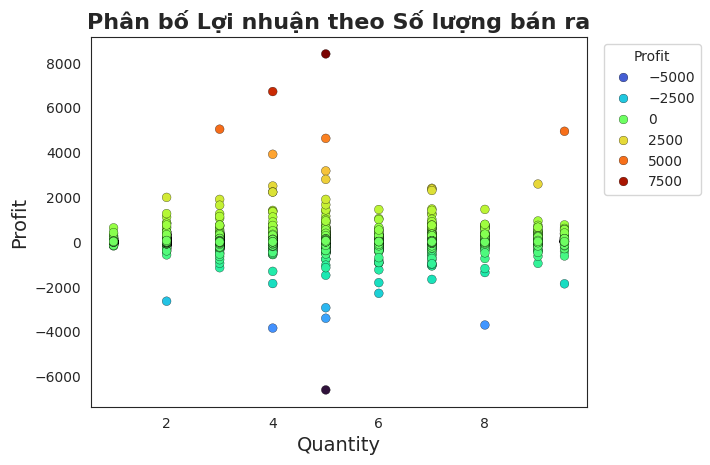

In [ ]:
#Phân bố lợi nhuận theo số lượng bán ra
sns.set_style("white")
sns.scatterplot(
    data=df,
    x='Quantity',
    y='Profit',
    hue='Profit',
    palette='turbo',
    s=40,
    edgecolor='black',
    linewidth=0.2
)

plt.title('Phân bố Lợi nhuận theo Số lượng bán ra',
          fontsize=16, weight='bold')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Profit', fontsize=14)

plt.legend(title='Profit', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Biểu đồ cho thấy mối quan hệ giữa số lượng sản phẩm được bán và mức lợi nhuận thu được. Nhìn chung, lợi nhuận dao động khá mạnh ở mọi mức số lượng, cho thấy Quantity không phải là yếu tố quyết định trực tiếp đến Profit.

Ở mức số lượng thấp (1–3 sản phẩm), lợi nhuận có xu hướng nằm gần vùng 0, với một số đơn hàng sinh lãi nhưng cũng có một số đơn bị lỗ. Tuy nhiên, khi số lượng tăng lên từ 4 đến 7, biên độ lợi nhuận mở rộng đáng kể — xuất hiện cả những đơn hàng lỗ sâu và những đơn hàng đạt lợi nhuận rất cao (trên 4000–8000). Điều này cho thấy số lượng lớn chỉ giúp khuếch đại kết quả; nếu giá bán và chi phí tốt thì sẽ lãi mạnh, còn nếu giảm giá cao hoặc chi phí lớn thì sẽ lỗ rất sâu.

Tương tự, ở mức số lượng cao hơn (8–10), lợi nhuận vẫn phân bố rất rộng, không cố định theo chiều tăng của quantity. Điều này thể hiện rằng số lượng bán ra không tạo ra xu hướng rõ ràng cho lợi nhuận, mà lợi nhuận phụ thuộc nhiều hơn vào Discount, Sales, Unit Price, và Cost của từng dòng sản phẩm.

Nhận định tổng quan:
Không xuất hiện xu hướng tuyến tính hay quan hệ rõ ràng giữa số lượng bán ra và lợi nhuận. Nói cách khác, bán nhiều không đảm bảo lãi nhiều, và bán ít cũng không đồng nghĩa lỗ — Quantity chỉ là yếu tố làm “phóng đại” mức lời/lỗ tùy thuộc vào cấu trúc chi phí và chính sách giảm giá của từng sản phẩm.

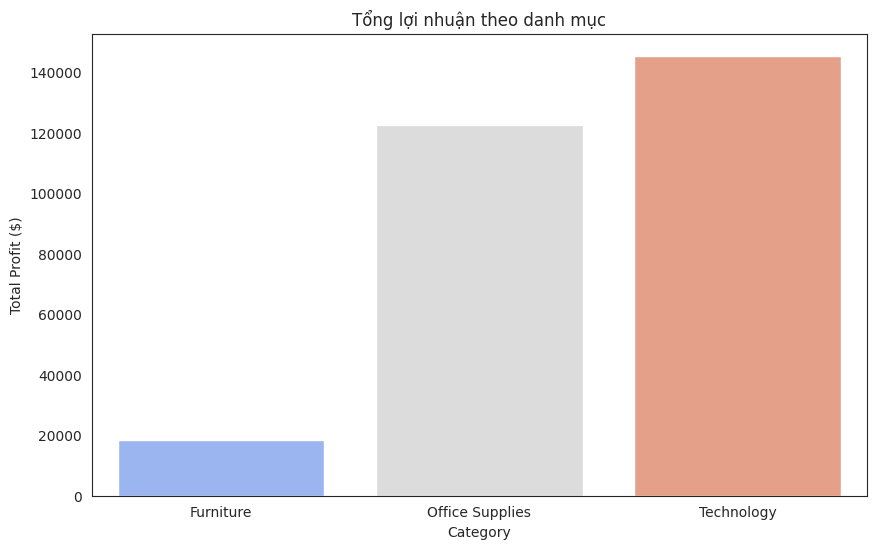

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='coolwarm')
plt.title('Tổng lợi nhuận theo danh mục')
plt.ylabel('Total Profit ($)')
plt.xlabel('Category')
plt.show()

Biểu đồ cho thấy mức độ đóng góp lợi nhuận của ba nhóm sản phẩm chính: Furniture, Office Supplies và Technology. Sự khác biệt giữa các danh mục khá rõ rệt và tạo thành một bức tranh tổng quan về nhóm sản phẩm mang lại giá trị cao nhất cho doanh nghiệp.

Danh mục Technology dẫn đầu với tổng lợi nhuận cao nhất, vượt mức 140.000 USD. Điều này phản ánh rằng các sản phẩm công nghệ thường có biên lợi nhuận tốt hơn, giá trị đơn hàng lớn hơn và nhu cầu tiêu thụ ổn định hơn. Đây có thể xem là nhóm sản phẩm “xương sống” trong hoạt động kinh doanh.

Office Supplies đứng thứ hai với khoảng 120.000 USD, chỉ thấp hơn một chút so với Technology. Tuy lợi nhuận không đột biến như các sản phẩm công nghệ, nhưng nhu cầu tiêu thụ văn phòng phẩm thường ổn định, số lượng giao dịch lớn và luân chuyển hàng nhanh, dẫn đến tổng lợi nhuận tích lũy tương đối cao.

Ngược lại, Furniture mang lại lợi nhuận thấp nhất, chỉ khoảng 18.000 USD – thấp hơn nhiều so với hai nhóm còn lại. Nguyên nhân có thể đến từ chi phí vận chuyển cao, giá vốn lớn, hoặc tỷ lệ giảm giá cao hơn, khiến biên lợi nhuận bị thu hẹp đáng kể.

Nhận định tổng quan:
Cơ cấu lợi nhuận cho thấy doanh nghiệp đang phụ thuộc lớn vào nhóm Technology và Office Supplies, trong khi Furniture đóng góp rất thấp. Doanh nghiệp nên xem xét tối ưu lại danh mục Furniture (giá vốn – vận chuyển – giảm giá – chiến lược bán hàng) để tránh lãng phí nguồn lực và cải thiện hiệu quả kinh doanh.

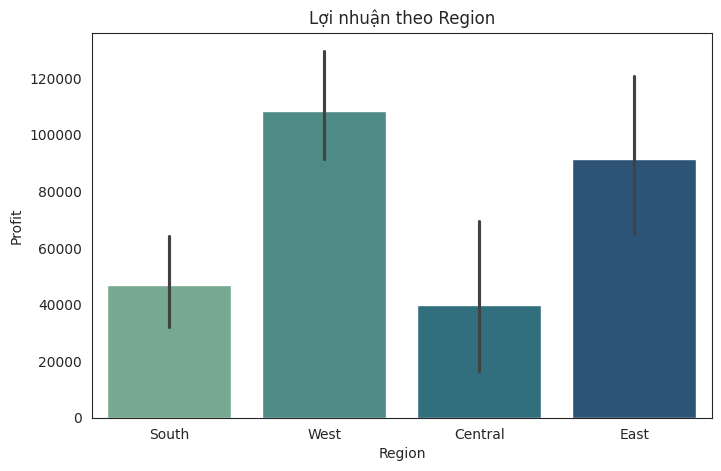

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=df, estimator='sum', palette='crest')
plt.title('Lợi nhuận theo Region')
plt.show()

Biểu đồ cột thể hiện lợi nhuận (Profit) đạt được theo từng khu vực (Region) trong kỳ báo cáo. Có thể nhận thấy sự chênh lệch khá rõ rệt về mức lợi nhuận giữa các vùng:

Khu vực West đạt lợi nhuận cao nhất, gần 110.000 đơn vị tiền tệ, vượt trội hoàn toàn so với các khu vực còn lại và chiếm vị trí dẫn đầu thuyết phục.
Khu vực East đứng thứ hai với mức lợi nhuận khoảng 93.000–95.000 đơn vị, dù thấp hơn West nhưng vẫn duy trì được kết quả kinh doanh rất tích cực.
Khu vực South có lợi nhuận thấp hơn đáng kể, chỉ đạt khoảng 48.000–50.000 đơn vị, bằng chưa tới một nửa so với khu vực dẫn đầu.
Khu vực Central ghi nhận kết quả thấp nhất, chỉ khoảng 40.000 đơn vị, thấp hơn South khoảng 8.000–10.000 đơn vị và chỉ bằng khoảng 36–37% mức lợi nhuận của khu vực West.

Như vậy, hai khu vực West và East đóng góp phần lớn vào tổng lợi nhuận toàn công ty, trong khi South và đặc biệt là Central đang hoạt động kém hiệu quả hơn hẳn. Khoảng cách lợi nhuận giữa nhóm dẫn đầu (West + East) và nhóm còn lại (South + Central) là rất lớn, lên tới hơn 100.000 đơn vị giữa khu vực cao nhất và thấp nhất.
Kết quả này cho thấy cần tập trung phân tích sâu nguyên nhân khiến West và East đạt hiệu quả vượt trội (mô hình kinh doanh, thị trường tiềm năng, đội ngũ bán hàng, chi phí vận hành…) để nhân rộng kinh nghiệm, đồng thời cần có biện pháp cải thiện rõ rệt đối với khu vực South và đặc biệt là Central trong các kỳ tiếp theo.

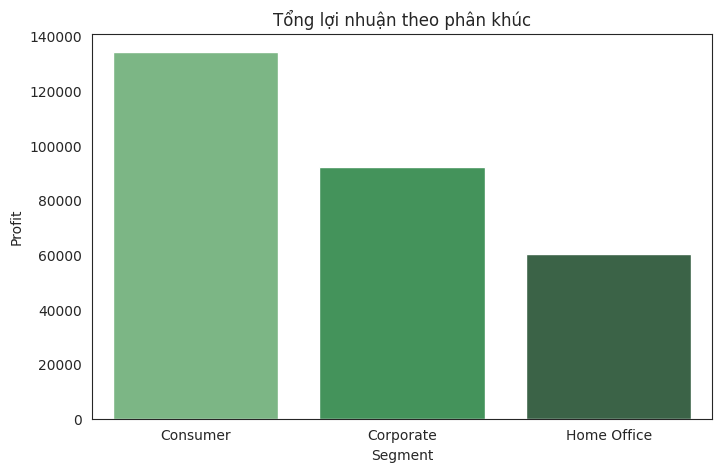

In [ ]:
# Tính tổng Profit theo Segment
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='Greens_d')
plt.title('Tổng lợi nhuận theo phân khúc')
plt.show()



Biểu đồ cột thể hiện tổng lợi nhuận (Profit) theo ba phân khúc khách hàng chính trong kỳ báo cáo, cho thấy sự khác biệt rất rõ nét về mức độ đóng góp lợi nhuận:

Phân khúc Consumer là nguồn lợi nhuận lớn nhất và chiếm ưu thế tuyệt đối, đạt khoảng 135.000–138.000 đơn vị tiền tệ. Phân khúc này đóng góp hơn một nửa tổng lợi nhuận toàn công ty và vượt xa hai phân khúc còn lại cộng lại.
Phân khúc Corporate đứng thứ hai với mức lợi nhuận khoảng 92.000–95.000 đơn vị, đạt khoảng 67–70% so với Consumer, vẫn là một nguồn lợi nhuận quan trọng nhưng đã giảm đáng kể về quy mô.
Phân khúc Home Office ghi nhận lợi nhuận thấp nhất, chỉ khoảng 62.000–65.000 đơn vị, bằng chưa tới một nửa so với Consumer và chỉ chiếm tỷ trọng nhỏ trong cơ cấu lợi nhuận tổng thể.

Có thể thấy cơ cấu lợi nhuận của công ty hiện đang phụ thuộc rất lớn vào phân khúc Consumer. Hai phân khúc Corporate và đặc biệt là Home Office có mức sinh lời thấp hơn rõ rệt, tạo ra sự mất cân đối đáng kể trong đóng góp lợi nhuận theo nhóm khách hàng.
Kết quả này gợi ý hai hướng hành động chính trong thời gian tới:
(1) Tiếp tục đầu tư mạnh và bảo vệ vị thế tại phân khúc Consumer – động lực tăng trưởng chính hiện tại;
(2) Đồng thời cần phân tích sâu nguyên nhân khiến Corporate và nhất là Home Office có hiệu suất lợi nhuận thấp (có thể do giá bán thấp, chi phí phục vụ cao, cạnh tranh gay gắt…) để đưa ra các giải pháp cải thiện biên lợi nhuận hoặc điều chỉnh cơ cấu danh mục khách hàng theo hướng bền vững hơn.

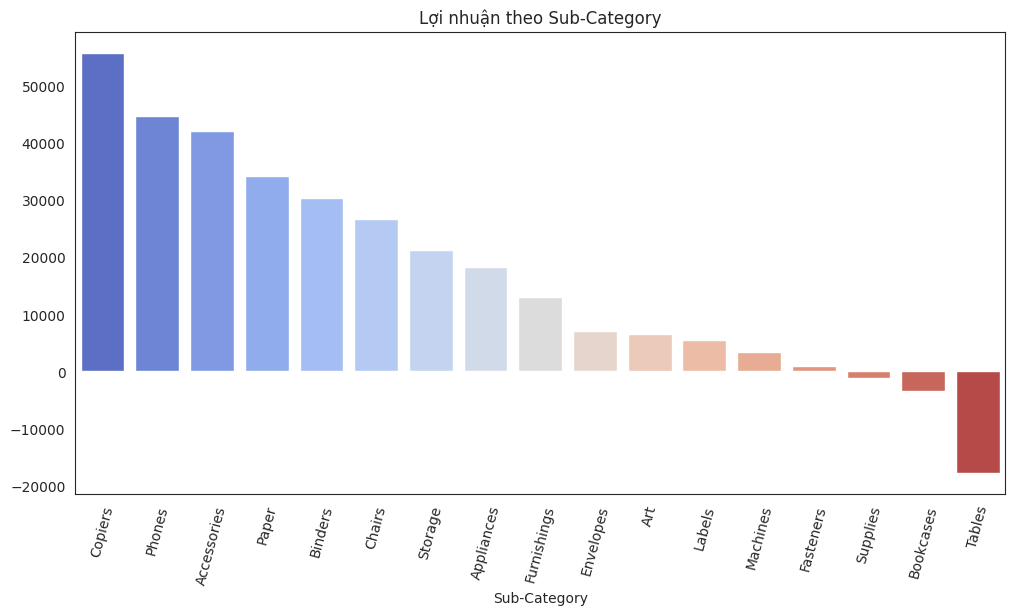

In [ ]:
plt.figure(figsize=(12,6))
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=sub_profit.index, y=sub_profit.values, palette='coolwarm')
plt.xticks(rotation=75)
plt.title('Lợi nhuận theo Sub-Category')
plt.show()

Biểu đồ lợi nhuận theo tiểu thể loại sản phẩm (Sub-Category) cho thấy sự phân hóa cực kỳ mạnh mẽ giữa các nhóm hàng – từ những sản phẩm tạo ra lợi nhuận rất lớn đến những sản phẩm thua lỗ nặng.
Nhóm tạo lợi nhuận cao nhất (Top performer)

Copiers (Máy photocopy) dẫn đầu vượt trội với lợi nhuận gần 55.000 đơn vị – là tiểu thể loại sinh lời mạnh nhất toàn công ty và chiếm ưu thế tuyệt đối.
Phones (Điện thoại), Accessories (Phụ kiện) và Paper (Giấy) tạo thành nhóm thứ hai rất vững chắc, lần lượt đạt khoảng 48.000, 44.000 và 36.000 đơn vị lợi nhuận. Đây là những tiểu thể loại ổn định, doanh số lớn và biên lợi nhuận tốt.
Binders (Bìa kẹp) và Chairs (Ghế văn phòng) tiếp tục mang về lợi nhuận tích cực (khoảng 30.000–32.000).

Nhóm lợi nhuận trung bình đến thấp

Storage (Thiết bị lưu trữ), Appliances (Thiết bị gia dụng), Furnishings (Đồ trang trí nội thất), Envelopes (Phong bì), Art, Labels đều có lợi nhuận dương nhưng ngày càng giảm dần, chỉ còn từ 6.000 đến 20.000 đơn vị.

Nhóm thua lỗ

Đặc biệt đáng chú ý là Tables (Bàn văn phòng) – tiểu thể loại duy nhất ghi nhận lỗ nặng, lên tới gần 18.000 đơn vị. Đây là “điểm đen” lớn nhất trong danh mục sản phẩm hiện tại.
Một số tiểu mục khác như Machines, Fasteners, Supplies, Bookcases tuy không lỗ nhưng lợi nhuận gần như bằng 0 hoặc rất thấp.

Nhận định tổng quát và khuyến nghị hành động

Chỉ 5–6 tiểu thể loại (Copiers, Phones, Accessories, Paper, Binders, Chairs) đang đóng góp phần lớn tổng lợi nhuận toàn công ty. Đây chính là những “con bò sữa” thực sự cần được bảo vệ, mở rộng và tối ưu thêm.
Ngược lại, Tables đang gây thất thoát nghiêm trọng và cần được xử lý quyết liệt: xem xét lại chính sách giá bán, chiết khấu lớn cho đại lý, chi phí nguyên liệu, hoặc thậm chí cân nhắc tạm ngừng kinh doanh dòng bàn hiện tại nếu không thể cải thiện biên lợi nhuận trong 1–2 quý tới.
Các tiểu thể loại có lợi nhuận rất thấp (Machines, Supplies, Bookcases, Fasteners…) cần được đánh giá lại toàn diện: hoặc cải thiện biên lợi nhuận gộp, hoặc giảm chi phí marketing & tồn kho, hoặc đưa vào danh mục “chỉ duy trì tối thiểu” thay vì đầu tư mở rộng.

Tóm lại, cơ cấu lợi nhuận theo tiểu thể loại đang cực kỳ mất cân đối: một số ít sản phẩm tạo ra lợi nhuận khổng lồ, trong khi một số khác lại kéo giảm hiệu quả tổng thể – đặc biệt là Tables. Việc tập trung nguồn lực vào nhóm sản phẩm sinh lời cao và xử lý dứt điểm các sản phẩm thua lỗ sẽ là đòn bẩy quan trọng để nâng cao đáng kể lợi nhuận tổng thể trong các kỳ tiếp theo.

## Chuyển đổi cột ngày và trích xuất thời gian

In [ ]:


df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Ekstraksi Year dan Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter

df[['Year', 'Month', 'Quarter']].head()

,Year,Month,Quarter
0,2016,11,4
1,2016,11,4
2,2016,6,2
3,2015,10,4
4,2015,10,4


## Lợi nhuận trung bình hàng tháng

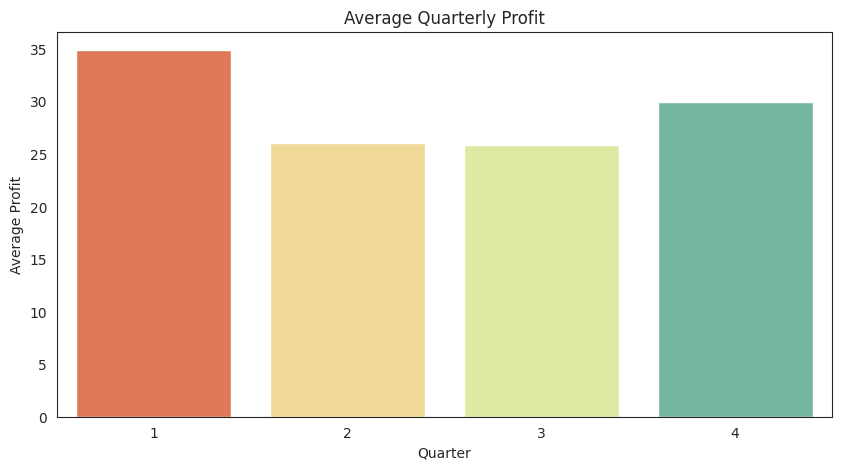

In [ ]:

# Group by 'Quarter' and calculate the mean profit
quarterly_profit = df.groupby('Quarter')['Profit'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=quarterly_profit.index, y=quarterly_profit.values, palette='Spectral')
plt.title('Average Quarterly Profit')
plt.xlabel('Quarter')
plt.ylabel('Average Profit')
plt.show()

Lợi nhuận trung bình hàng tháng có tính mùa vụ rõ rệt, với hai đỉnh cao vào tháng 3 và đặc biệt là quý 4 (tháng 10–11–12). Doanh số và lợi nhuận tăng mạnh mẽ trong quý cuối năm cho thấy công ty đã tận dụng rất hiệu quả xu hướng mua sắm theo mùa. Ngược lại, quý 2 (tháng 4–5–6) là giai đoạn trũng lợi nhuận thấp nhất trong năm, có thể do nhu cầu giảm tự nhiên sau quý 1 và trước mùa tựu trường.
Xu hướng tăng trưởng từ tháng 7 đến tháng 11 rất ổn định và mạnh mẽ, chứng tỏ hoạt động kinh doanh đang được mở rộng đều đặn, năng lực bán hàng và quản trị chi phí (chiết khấu, vận chuyển, tồn kho) trong quý 4 đã được cải thiện đáng kể so với các năm trước.
Khuyến nghị:

Duy trì và gia tăng đầu tư marketing, tồn kho, nhân sự bán hàng & logistics mạnh hơn nữa trong quý 4 để tiếp tục đẩy cao đỉnh mùa.
Đồng thời cần xây dựng các chương trình kích cầu đặc biệt trong quý 2 (tháng 4–6) nhằm giảm bớt độ sâu của mùa thấp điểm hiện tại.

## Top 10 khách hàng có lợi nhuận cao nhất

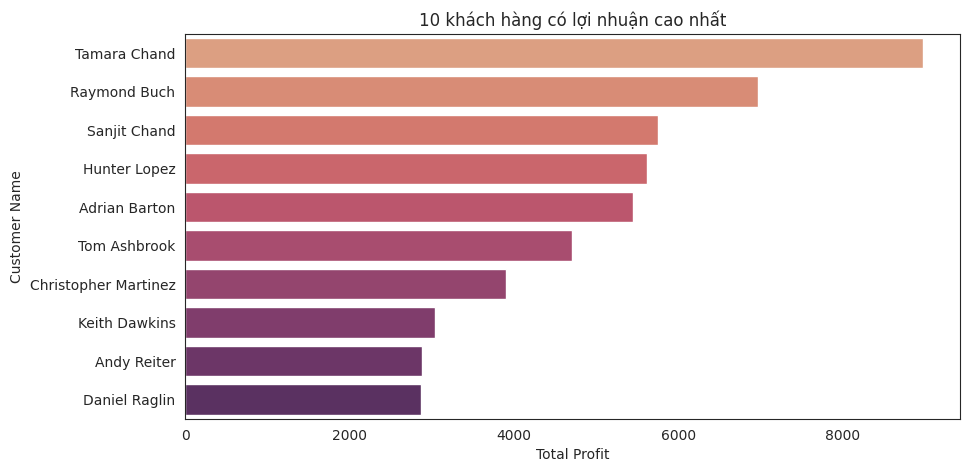

,Customer Name,Profit
730,Tamara Chand,8981.3239
622,Raymond Buch,6976.0959
671,Sanjit Chand,5757.4119
334,Hunter Lopez,5622.4292
6,Adrian Barton,5444.8055
757,Tom Ashbrook,4703.7883
157,Christopher Martinez,3899.8904
431,Keith Dawkins,3038.6254
35,Andy Reiter,2884.6208
194,Daniel Raglin,2869.0760


In [ ]:
top_customers = df.groupby('Customer Name')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Profit', y='Customer Name', data=top_customers, palette='flare')
plt.title('10 khách hàng có lợi nhuận cao nhất')
plt.xlabel('Total Profit')
plt.ylabel('Customer Name')
plt.show()

top_customers

- Khách hàng đóng góp lớn nhất

Tamara Chand đứng đầu danh sách với mức lợi nhuận vượt trội, gần 9.000.
→ Đây là khách hàng tạo ra giá trị cao nhất cho doanh nghiệp, có thể thuộc nhóm mua hàng lớn, mua định kỳ hoặc chọn các mặt hàng có biên lợi nhuận cao.

Đứng thứ hai và ba là Raymond Buch và Sanjit Chand, lần lượt khoảng 7.000 và 6.000 lợi nhuận.
→ Ba khách hàng dẫn đầu tạo ra tỷ lệ lớn trong tổng lợi nhuận, đóng vai trò quan trọng trong nhóm khách hàng ưu tiên.

- Chênh lệch giữa các nhóm khách hàng

Có sự giảm dần rõ rệt về lợi nhuận từ khách hàng thứ 1 đến thứ 10, thể hiện quy luật Pareto (20% khách hàng tạo ra phần lớn lợi nhuận).

Nhóm từ Hunter Lopez → Adrian Barton → Tom Ashbrook đều đóng góp lợi nhuận khá cao, nằm trong khoảng 5.000 – 5.500.

Các khách hàng cuối bảng (Christopher Martinez, Keith Dawkins, Andy Reiter, Daniel Raglin) có lợi nhuận xấp xỉ 2.500 – 3.000.

=> Biểu đồ cho thấy doanh nghiệp đang phụ thuộc khá nhiều vào một nhóm khách hàng giá trị cao, trong đó Tamara Chand và Raymond Buch là những người đóng góp nổi bật nhất. Việc tập trung giữ chân nhóm khách hàng này có thể giúp ổn định và tăng trưởng lợi nhuận trong các giai đoạn tiếp theo.

## Phân tích danh mục phụ tốt nhất dựa trên lợi nhuận

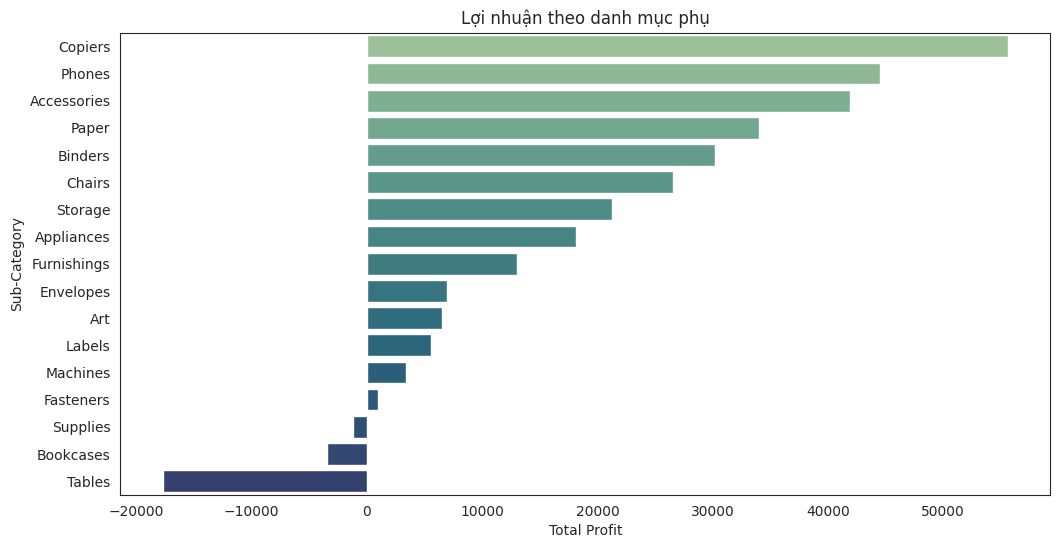

,Sub-Category,Sales,Profit
6,Copiers,33279.894,55617.8249
13,Phones,222360.838,44515.7306
0,Accessories,127450.854,41936.6357
12,Paper,77853.676,34053.5693
3,Binders,100926.615,30221.7633
5,Chairs,206182.577,26590.1663
14,Storage,165554.016,21278.8264
1,Appliances,74669.783,18138.0054
9,Furnishings,85028.982,13059.1436
7,Envelopes,16370.676,6964.1767


In [ ]:
subcat_perf = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Profit', y='Sub-Category', data=subcat_perf, palette='crest')
plt.title('Lợi nhuận theo danh mục phụ')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()

subcat_perf.head(10)

- Các Danh mục phụ Tạo ra Lợi nhuận Cao nhất (High-Profit Drivers)
Các danh mục sau đây là động lực lợi nhuận chính và nên được ưu tiên duy trì hoặc mở rộng:

Máy photocopy (Copiers): Đứng đầu với mức lợi nhuận vượt trội, ước tính khoảng 55.000. Đây là danh mục sinh lời rõ ràng nhất và đóng góp lớn nhất vào tổng lợi nhuận.

Điện thoại (Phones): Xếp thứ hai với lợi nhuận khoảng 47.000. Cùng với Máy photocopy, hai danh mục này tạo nên một phần đáng kể của lợi nhuận dương, cho thấy sản phẩm Công nghệ (Technology) có hiệu suất lợi nhuận cao nhất.

Phụ kiện (Accessories) và Giấy (Paper): Tiếp tục là các danh mục mang lại lợi nhuận cao, lần lượt đạt khoảng 42.000 và 36.000. Đây là các mặt hàng bổ trợ hoặc tiêu hao nhưng có khả năng sinh lời ổn định.

Nhận định chung: Khoảng 8 danh mục hàng đầu, bao gồm Còng (Binders), Ghế (Chairs), Lưu trữ (Storage) và Thiết bị (Appliances), đều cho thấy hiệu suất lợi nhuận trên 18.000. Cần có chiến lược để bảo vệ thị phần và giá bán của các mặt hàng chủ lực này.

- Các Danh mục phụ Cần Theo dõi và Cải thiện (Moderate to Low-Profit Categories)
Các danh mục có lợi nhuận dương nhưng thấp cần được xem xét để tối ưu hóa chi phí hoặc tăng cường doanh số:

Đồ nội thất/Trang trí (Furnishings): Lợi nhuận chỉ đạt khoảng 15.000. Mặc dù thuộc nhóm Đồ nội thất (Furniture), nhưng lại có lợi nhuận thấp hơn nhiều so với Ghế (Chairs), cho thấy khả năng sinh lời không đồng đều trong cùng một nhóm sản phẩm chính.

Văn phòng phẩm khác (Envelopes, Art, Labels): Các mặt hàng này có lợi nhuận khá khiêm tốn, dao động từ 3.000 đến 7.000. Mặc dù có lợi nhuận dương, chúng đóng góp ít vào tổng lợi nhuận. Cần xem xét chi phí tồn kho, vận chuyển hoặc liệu chúng có thể được bán kèm theo các sản phẩm lợi nhuận cao hơn (bundle sales) để tối đa hóa hiệu quả hay không.

Máy móc (Machines) và Vật liệu (Fasteners/Supplies): Các danh mục này có lợi nhuận dương rất thấp, gần như chạm mức hòa vốn (khoảng 500 - 1.000). Đây là dấu hiệu cảnh báo rằng biên lợi nhuận cực kỳ mỏng và dễ dàng chuyển sang âm nếu có sự tăng nhẹ về chi phí hoặc giảm giá.

- Các Danh mục Gây thua lỗ (Negative-Profit Categories)
Đây là các danh mục đang làm giảm tổng lợi nhuận của công ty và cần hành động can thiệp ngay lập tức:

Bàn (Tables): Danh mục gây thua lỗ lớn nhất với lợi nhuận âm xấp xỉ -18.000. Mức lỗ này là đáng kể và gần bằng một phần ba lợi nhuận của Máy photocopy. Cần phải phân tích ngay lập tức các yếu tố như chi phí vận chuyển/lắp đặt cao, giảm giá quá mức, hay chất lượng sản phẩm dẫn đến trả hàng.

Tủ sách (Bookcases): Gây thua lỗ khoảng -5.000. Mặc dù mức lỗ nhỏ hơn Bàn, nhưng cả hai đều thuộc nhóm Đồ nội thất (Furniture), xác nhận đây là nhóm sản phẩm có vấn đề về lợi nhuận nghiêm trọng nhất.

Hành động đề xuất: Cần xem xét lại mô hình định giá, chuỗi cung ứng, và chi phí giao hàng/lắp đặt cho các sản phẩm Đồ nội thất lớn như Bàn và Tủ sách. Nếu không thể cải thiện biên lợi nhuận, cần xem xét việc loại bỏ hoặc thay thế các sản phẩm này.

- Tóm lại
Biểu đồ cho thấy sự phân hóa rõ rệt: Máy photocopy và Điện thoại là các nguồn tạo ra lợi nhuận cao (Profit Engines). Ngược lại, Đồ nội thất (đặc biệt là Bàn và Tủ sách) là các nguồn gây thất thoát lợi nhuận (Profit Sinks) và cần được giải quyết khẩn cấp.

## Top 10 sản phẩm có lợi nhuận cao nhất

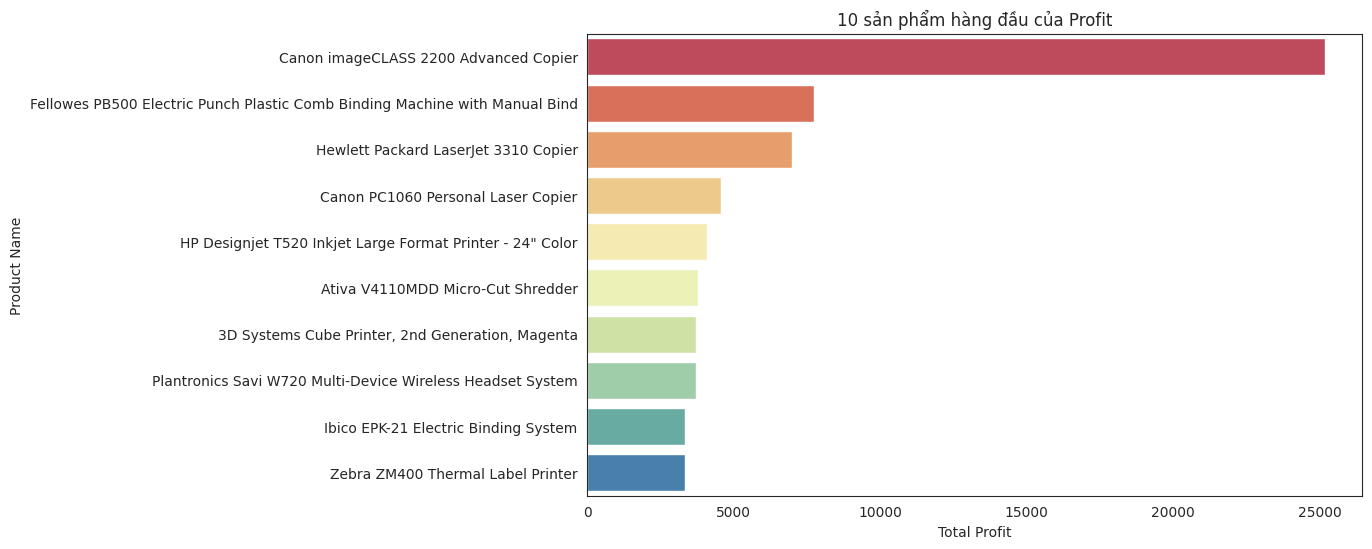

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


In [ ]:
top_profit_products = df.groupby('Product Name')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Profit', y='Product Name', data=top_profit_products, palette='Spectral')
plt.title('10 sản phẩm hàng đầu của Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

top_profit_products

- Sản phẩm Dẫn đầu và Sự Chi phối Lợi nhuận (The Profit Champion)
Canon imageCLASS 2200 Advanced Copier: Sản phẩm này hoàn toàn thống trị bảng xếp hạng với lợi nhuận xấp xỉ 25.000. Mức lợi nhuận này gấp hơn ba lần so với sản phẩm đứng thứ hai, cho thấy nó là một nguồn lợi nhuận chủ chốt (Key Profit Driver) không thể thay thế.

Sự đóng góp vượt trội này khẳng định nhận định về việc các sản phẩm có chi phí đơn vị cao (như Máy photocopy) thường mang lại lợi nhuận cao nhờ biên lợi nhuận lớn và giá trị giao dịch cao.

- Các Sản phẩm Tạo Lợi nhuận Mạnh Mẽ (Strong Profit Contributors)
Các sản phẩm này tạo ra lợi nhuận đáng kể và tạo nên tầng lợi nhuận thứ hai của doanh nghiệp:

Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind: Xếp thứ hai với lợi nhuận khoảng 8.000.

Hewlett Packard LaserJet 3310 Copier: Xếp thứ ba, lợi nhuận cũng xấp xỉ 7.000.

Hai sản phẩm này (Máy đóng gáy và Máy photocopy) là những sản phẩm chiến lược, đảm bảo lợi nhuận ổn định và nên được ưu tiên trong các chiến dịch bán hàng.

- Các Sản phẩm Có Lợi nhuận Vừa Phải (Moderate Profit Categories)
Đây là nhóm sản phẩm có lợi nhuận từ khoảng 4.000 đến 5.000, tạo thành một nhóm đóng góp đồng đều:

Canon PC1060 Personal Laser Copier: Khoảng 4.800.

HP Designjet T520 Inkjet Large Format Printer - 24" Color: Khoảng 4.500.

Ativa V4110MDD Micro-Cut Shredder và 3D Systems Cube Printer, 2nd Generation, Magenta: Cả hai đều có lợi nhuận gần 4.000.

Nhận định: Sự xuất hiện của Máy hủy tài liệu (Shredder) và Máy in 3D (3D Printer) trong nhóm này cho thấy sự đa dạng hóa lợi nhuận không chỉ nằm trong các thiết bị văn phòng truyền thống (máy photocopy) mà còn mở rộng sang các công cụ chuyên dụng và công nghệ mới.

- Các Sản phẩm Vừa Đủ Lọt vào Top 10 (Marginal Top Performers)
Các sản phẩm này chỉ vừa đủ lọt vào top 10 và có mức lợi nhuận thấp nhất trong nhóm:

Plantronics Savi W720 Multi-Device Wireless Headset System, Ibico EPK-21 Electric Binding System, và Zebra ZM400 Thermal Label Printer: Lợi nhuận của nhóm này dao động chỉ từ 3.000 đến 3.500.

Mặc dù là sản phẩm có lợi nhuận dương, nhưng mức lợi nhuận của chúng chỉ bằng khoảng 1/7 so với sản phẩm đứng đầu. Điều này cho thấy sự tập trung lợi nhuận rất cao vào một vài sản phẩm chủ lực (đặc biệt là Canon imageCLASS 2200).

- Tóm lại:
Sự Tập trung Lợi nhuận: Tổng lợi nhuận của doanh nghiệp đang bị chi phối nặng nề bởi một sản phẩm duy nhất (Canon imageCLASS 2200 Advanced Copier). Điều này tạo ra rủi ro: nếu sản phẩm này bị ngừng sản xuất, bị cạnh tranh mạnh, hoặc có vấn đề về chuỗi cung ứng, tổng lợi nhuận sẽ bị ảnh hưởng nghiêm trọng.



## Phân tích doanh số và lợi nhuận theo từng tiểu bang

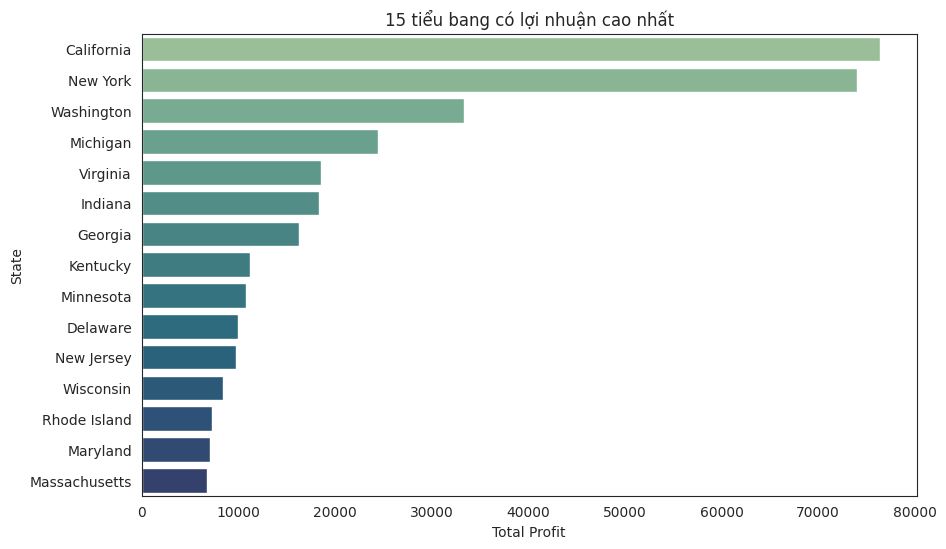

,State,Sales,Profit
3,California,294221.0775,76381.3871
30,New York,169214.6270,74038.5486
45,Washington,75671.5260,33402.6517
20,Michigan,42700.6960,24463.1876
44,Virginia,36110.6400,18597.9504
12,Indiana,23167.3700,18382.9363
9,Georgia,28137.8300,16250.0433
15,Kentucky,22769.0600,11199.6966
21,Minnesota,13635.6000,10823.1874
6,Delaware,13060.6590,9977.3748


In [ ]:
state_perf = df.groupby('State')[['Sales','Profit']].sum().reset_index().sort_values(by='Profit', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Profit', y='State', data=state_perf, palette='crest')
plt.title('15 tiểu bang có lợi nhuận cao nhất')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()

state_perf

- Các Tiểu bang Chiếm ưu thế về Lợi nhuận (Profit Dominators)
California: Dẫn đầu tuyệt đối với tổng lợi nhuận cao nhất, ước tính xấp xỉ 78.000. Mức lợi nhuận này vượt trội so với tất cả các tiểu bang khác.

New York: Xếp vị trí thứ hai với lợi nhuận khoảng 73.000. Cùng với California, hai tiểu bang này tạo ra hơn 40% tổng lợi nhuận của toàn bộ 15 tiểu bang đứng đầu.

Nhận định: Sự tập trung lợi nhuận cao ở hai tiểu bang này (California và New York) cho thấy tầm quan trọng của các thị trường lớn, đông dân cư hoặc có trung tâm kinh tế phát triển. Cần có chiến lược để duy trì và mở rộng thị phần tại hai khu vực này.

- Các Tiểu bang Đóng góp Lợi nhuận Mạnh mẽ (Strong Profit Contributors)
Các tiểu bang này tạo thành nhóm đóng góp lợi nhuận đáng kể tiếp theo, duy trì ở mức trên 20.000:

Washington: Với lợi nhuận khoảng 33.000, đứng vị trí thứ ba.

Michigan: Đạt khoảng 25.000 lợi nhuận.

Virginia và Indiana: Cả hai đều có lợi nhuận xấp xỉ 20.000.

Nhận định: Các tiểu bang này có sự đóng góp mạnh mẽ, cho thấy hoạt động kinh doanh thành công không chỉ giới hạn ở hai thị trường lớn nhất. Cần phân tích các yếu tố dẫn đến hiệu suất lợi nhuận cao ở đây (ví dụ: chi phí vận hành/vận chuyển thấp, hoặc nhu cầu cao đối với các sản phẩm có biên lợi nhuận cao).

- Các Tiểu bang Có Lợi nhuận Thấp hơn (Lower Tier Contributors)
Nhóm này bao gồm các tiểu bang có lợi nhuận dương nhưng thấp hơn đáng kể, nằm trong khoảng dưới 15.000:

Từ Georgia đến New Jersey: Lợi nhuận dao động từ khoảng 10.000 đến 18.000.

Wisconsin, Rhode Island, Maryland, và Massachusetts: Các tiểu bang cuối bảng có lợi nhuận rất khiêm tốn, chỉ từ 5.000 đến 8.000.

Nhận định: Khoảng cách lợi nhuận giữa nhóm dẫn đầu (California) và nhóm cuối cùng (Massachusetts) là rất lớn (gấp khoảng 10 lần). Điều này cho thấy cần xem xét các chiến lược khác nhau cho từng nhóm tiểu bang:

Đối với các tiểu bang có lợi nhuận trung bình (ví dụ: Georgia, Kentucky): Tìm cách tăng cường doanh số của các sản phẩm có biên lợi nhuận cao.

Đối với các tiểu bang có lợi nhuận thấp: Cần phân tích liệu chi phí vận hành có đang làm giảm lợi nhuận không.

- Tóm lại:
Mức độ phân tán lợi nhuận: Lợi nhuận được phân bổ không đồng đều. Chỉ hai tiểu bang (California và New York) đã tạo ra một lượng lợi nhuận khổng lồ, làm tăng rủi ro tập trung địa lý.


## Phân tích phương thức vận chuyển về lợi nhuận và thời gian giao hàng

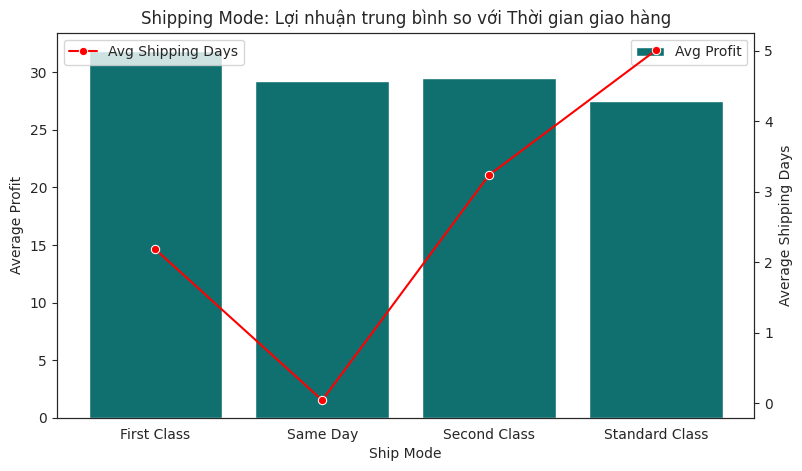

,Ship Mode,Sales,Profit,Shipping Days
0,First Class,138.836699,31.839948,2.182705
1,Same Day,141.667063,29.266591,0.044199
2,Second Class,143.598910,29.535545,3.238046
3,Standard Class,139.445950,27.494770,5.006535


In [ ]:
# Tạo cột tuổi giao hàng (ngày)
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

shipping_perf = df.groupby('Ship Mode')[['Sales','Profit','Shipping Days']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(9,5))
sns.barplot(x='Ship Mode', y='Profit', data=shipping_perf, color='teal', label='Avg Profit')
ax2 = ax1.twinx()
sns.lineplot(x='Ship Mode', y='Shipping Days', data=shipping_perf, color='red', marker='o', label='Avg Shipping Days')

ax1.set_title('Shipping Mode: Lợi nhuận trung bình so với Thời gian giao hàng')
ax1.set_ylabel('Average Profit')
ax2.set_ylabel('Average Shipping Days')

plt.show()

shipping_perf

- Hiệu suất Lợi nhuận Trung bình (Average Profit - Cột Màu Xanh)
Lợi nhuận Ổn định: Nhìn chung, tất cả các phương thức vận chuyển đều có mức lợi nhuận trung bình khá đồng đều, dao động trong khoảng từ 27 đến 31.

First Class (Hạng Nhất) có lợi nhuận trung bình cao nhất, xấp xỉ 31.

Second Class (Hạng Nhì) và Same Day (Trong Ngày) có lợi nhuận trung bình gần như nhau, khoảng 29.5.

Standard Class (Hạng Tiêu chuẩn) có lợi nhuận trung bình thấp nhất, khoảng 27.5.

Nhận định: Mặc dù có sự khác biệt nhỏ, sự ổn định này cho thấy chi phí vận chuyển của các phương thức này đã được định giá hiệu quả trong cơ cấu giá bán, không có phương thức nào gây thiệt hại lớn về lợi nhuận trung bình tổng thể.

- Hiệu suất Thời gian Giao hàng Trung bình (Average Shipping Days - Đường Đỏ)
Mức độ biến động của Thời gian giao hàng trung bình cao hơn nhiều so với lợi nhuận:

Giao hàng Nhanh nhất (Fastest Delivery):

Same Day (Trong Ngày) có thời gian giao hàng trung bình thấp nhất, gần 0 ngày (trên thực tế là dưới 0.5 ngày), điều này là hợp lý theo tên gọi của nó.

First Class (Hạng Nhất) có thời gian giao hàng trung bình cao hơn một chút, khoảng 2.3 ngày.

Giao hàng Chậm nhất (Slowest Delivery):

Standard Class (Hạng Tiêu chuẩn) có thời gian giao hàng trung bình cao nhất, vượt ngưỡng 4.5 ngày.

Second Class (Hạng Nhì) có thời gian giao hàng trung bình khoảng 3.3 ngày.

- Phân tích Mối Quan hệ Lợi nhuận - Thời gian (Trade-off Analysis)
Có một mối quan hệ nghịch đảo bất thường giữa tốc độ giao hàng và lợi nhuận trung bình, ngoại trừ Same Day:

Same Day (Tốc độ tối ưu, Lợi nhuận chấp nhận được): Mặc dù có thời gian giao hàng nhanh nhất, lợi nhuận trung bình của Same Day (~29.5) không phải là thấp nhất, mặc dù có thể bị ảnh hưởng bởi chi phí vận hành cao như bạn đã đề cập. Đây là một điểm mạnh về mặt dịch vụ khách hàng.

Standard Class (Rủi ro về sự hài lòng): Phương thức có thời gian giao hàng chậm nhất lại có lợi nhuận trung bình thấp nhất. Điều này tạo ra một điểm yếu: khách hàng chờ đợi lâu hơn nhưng doanh nghiệp lại kiếm được ít hơn. Cần xem xét lại chi phí liên quan đến phương thức này hoặc liệu nó có được sử dụng cho các đơn hàng có biên lợi nhuận thấp hơn không.

First Class (Hiệu quả nhất): Cho thấy lợi nhuận trung bình cao nhất (~31) trong khi chỉ có thời gian giao hàng trung bình (~2.3 ngày). Đây là phương thức tối ưu về mặt cân bằng giữa tốc độ và khả năng sinh lời.

- Tóm lại
Biểu đồ cho thấy First Class là phương thức vận chuyển hiệu quả nhất, mang lại lợi nhuận cao nhất với tốc độ giao hàng tương đối nhanh. Ngược lại, Standard Class là phương thức kém hiệu quả nhất, có lợi nhuận thấp nhất và thời gian giao hàng chậm nhất.

## Bản đồ nhiệt lợi nhuận khu vực

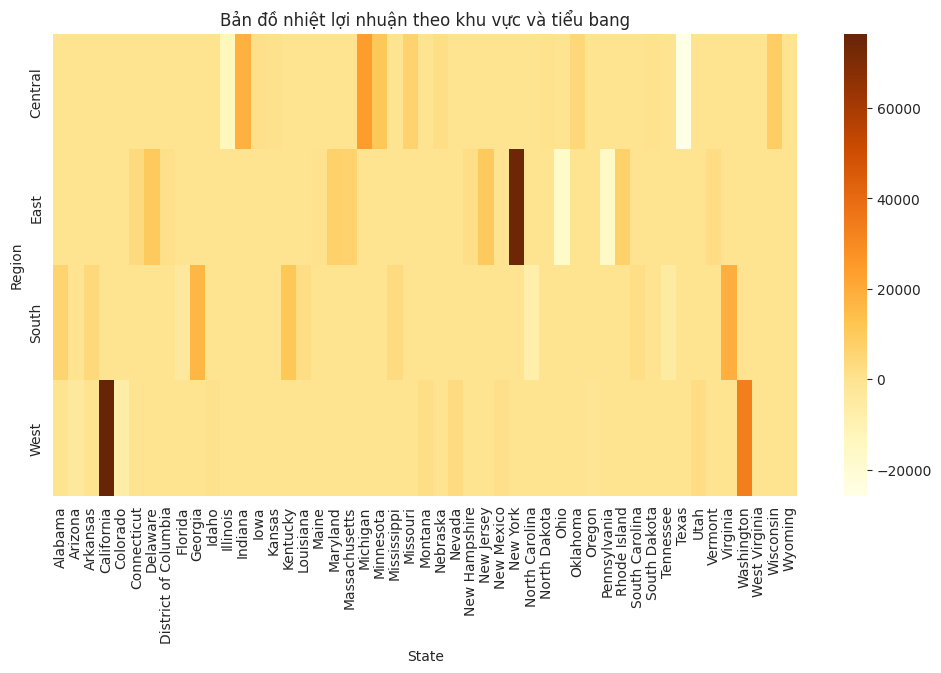

In [ ]:
region_state = df.groupby(['Region','State'])['Profit'].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(region_state, cmap='YlOrBr')
plt.title('Bản đồ nhiệt lợi nhuận theo khu vực và tiểu bang')
plt.xlabel('State')
plt.ylabel('Region')
plt.show()

- Các Khu vực và Tiểu bang Chi phối Lợi nhuận (Profit Dominators)
Khu vực Bờ Tây (West Region):

California: Tiểu bang này thể hiện rõ ràng là điểm nóng lợi nhuận (Profit Hotspot) lớn nhất. Với màu nâu đỏ đậm nhất, nó cho thấy mức lợi nhuận vượt trội, ước tính trên 60.000 (phù hợp với biểu đồ 15 tiểu bang có lợi nhuận cao nhất).

Khu vực Miền Đông (East Region):

New York: Đây là điểm nóng lợi nhuận lớn thứ hai, thể hiện qua màu nâu đậm. Mặc dù cường độ màu thấp hơn một chút so với California, nó xác nhận New York là một thị trường trọng điểm có khả năng sinh lời cao.

- Các Khu vực Có Hiệu suất Sinh lời Kém (Underperforming Regions)
Khu vực Miền Trung (Central Region):

Nhìn chung, khu vực này thể hiện màu sắc rất nhạt, chủ yếu là màu vàng kem hoặc trắng, cho thấy hầu hết các tiểu bang ở đây có lợi nhuận thấp hoặc đang lỗ.

Chỉ có một vài điểm sáng nhẹ (màu vàng đậm hơn) như Texas và Michigan, nhưng chúng không đủ để bù đắp cho sự yếu kém lợi nhuận chung của khu vực.

Khu vực Miền Nam (South Region):

Tương tự như Khu vực Miền Trung, Miền Nam cũng cho thấy màu sắc chủ yếu là nhạt, chỉ ra lợi nhuận thấp.

Các tiểu bang như Virginia, Georgia, và Florida có màu vàng đậm hơn, cho thấy chúng là những điểm sáng lợi nhuận chính trong khu vực này.

- Nhận định về Sự Phân bổ Lợi nhuận
Sự Tập trung Lợi nhuận: Lợi nhuận của doanh nghiệp bị tập trung cực kỳ cao vào một số tiểu bang cụ thể, chủ yếu là California (West) và New York (East). Điều này xác nhận rằng hiệu suất kinh doanh đang được đẩy mạnh bởi các thị trường lớn ở hai bờ biển, trong khi các khu vực nội địa (Central và South) đang gặp khó khăn trong việc tạo ra lợi nhuận đáng kể.

- Vấn đề Khu vực:

Khu vực Central cần được phân tích chi phí sâu hơn, đặc biệt là chi phí vận chuyển hoặc chi phí hoạt động, có thể đang làm xói mòn lợi nhuận.

Khu vực West mặc dù có California chi phối lợi nhuận, nhưng vẫn có các tiểu bang thể hiện lợi nhuận âm/thấp (màu trắng/vàng rất nhạt).

- Kết luận tạm thời:

Hiệu suất khu vực và phương thức vận chuyển có tác động đáng kể đến lợi nhuận.
Phân tích này giúp các công ty hiểu rõ hiệu quả phân phối và dịch vụ khách hàng trên khắp các khu vực.
Việc tối ưu hóa phương thức vận chuyển và quản lý hàng tồn kho trên khắp các khu vực có thể tăng cả lợi nhuận và sự hài lòng của khách hàng.

## Bản đồ hiệu suất khu vực

In [ ]:
#Chuyển đổi tên tiểu bang thành mã 2 chữ cái
state_codes = {
    'California': 'CA', 'Texas': 'TX', 'New York': 'NY', 'Washington': 'WA',
    'Florida': 'FL', 'Nevada': 'NV', 'Illinois': 'IL', 'Colorado': 'CO',
    'Ohio': 'OH', 'Pennsylvania': 'PA', 'Georgia': 'GA', 'Michigan': 'MI',
    'Oregon': 'OR', 'Arizona': 'AZ', 'North Carolina': 'NC', 'Indiana': 'IN'
}
# Thêm cột mã 2 chữ cái
df['State_Code'] = df['State'].map(state_codes)
# Không thể sử dụng NaN trước diplot
df_state = df.groupby('State_Code', as_index=False)['Profit'].sum().dropna()

# Vẽ đồ thị
fig = px.choropleth(
    df_state,
    locations='State_Code',
    locationmode='USA-states',
    scope='usa',
    color='Profit',
    hover_name='State_Code',
    color_continuous_scale='RdYlGn',
    title='Phân phối lợi nhuận giữa các tiểu bang'
)

fig.update_layout(template='plotly_white')
fig.show()

Lợi nhuận Chi phối (Màu Xanh Đậm):

California và New York hiển thị màu xanh đậm nhất (gần 60k), xác nhận vai trò là hai động lực lợi nhuận chính của công ty. Màu sắc này cho thấy hiệu quả kinh doanh cao ở hai thị trường lớn này.

Các Vùng Lỗ Lớn (Màu Đỏ Đậm):

Texas hiển thị màu đỏ đậm nhất, chỉ ra đây là tiểu bang có mức thua lỗ lớn nhất (dưới -20k). Mức lỗ này cần được ưu tiên điều tra vì nó làm giảm đáng kể tổng lợi nhuận chung.

Illinois, Ohio, Pennsylvania, và North Carolina cũng hiển thị màu đỏ hoặc cam, cho thấy lợi nhuận âm đáng kể, tạo thành một vành đai thua lỗ kéo dài qua Trung Tây và Đông Nam.

Lợi nhuận Yếu (Màu Vàng/Xanh Nhạt):

Phần lớn các tiểu bang còn lại có màu vàng hoặc xanh nhạt, thể hiện lợi nhuận dương nhưng ở mức vừa phải hoặc thấp (dưới 40k). Điều này cho thấy tiềm năng tăng trưởng lợi nhuận ở các thị trường này vẫn còn lớn.

=> Kết luận
Đoạn mã đã thành công trong việc chuyển đổi dữ liệu và trực quan hóa tổng lợi nhuận theo địa lý. Biểu đồ Choropleth là một công cụ phân tích mạnh mẽ, cho thấy sự phân cực rõ rệt trong hiệu suất tài chính: lợi nhuận tập trung ở hai bờ biển, trong khi một số thị trường lớn nội địa (như Texas) lại gây ra thua lỗ nghiêm trọng.

##  Xu hướng lợi nhuận theo thời gian


In [ ]:
# Đảm bảo cột ngày tháng chính xác
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Nhóm theo tháng và chỉ tính tổng các cột số
monthly = df.groupby(pd.Grouper(key='Order Date', freq='M')).sum(numeric_only=True).reset_index()

# Trực quan hóa xu hướng lợi nhuận hàng tháng
fig = px.line(
    monthly,
    x='Order Date',
    y='Profit',
    title='Xu hướng lợi nhuận hàng tháng',
    markers=True,
    line_shape='spline'
)
fig.update_layout(template='plotly_white')
fig.show()


Biểu đồ cho thấy lợi nhuận tăng trưởng ổn định qua các năm từ 2014 đến 2017, với biên độ dao động ngày càng lớn. Mỗi năm đều xuất hiện mô hình mùa vụ rõ rệt, khi lợi nhuận thường giảm mạnh vào đầu năm và tăng mạnh vào giai đoạn cuối năm (Q4). Đây là những giai đoạn quan trọng cần được doanh nghiệp chú ý khi lập kế hoạch bán hàng và phân bổ ngân sách.

Các đỉnh lợi nhuận tăng dần theo từng năm, đặc biệt nổi bật vào cuối 2016 và đầu 2017, cho thấy khả năng doanh thu cải thiện hoặc chiến lược bán hàng hiệu quả hơn. Tuy nhiên, biểu đồ cũng xuất hiện các điểm giảm sâu bất thường, phản ánh tác động mạnh của các chương trình chiết khấu, biến động chi phí hoặc những đợt hoàn trả hàng.

Nhìn chung, biểu đồ cung cấp cái nhìn trực quan để doanh nghiệp:

Dự báo chu kỳ cao điểm và thấp điểm trong năm.

Điều chỉnh chiến lược giá và khuyến mãi để hạn chế các điểm lợi nhuận âm.

Tối ưu tồn kho và nguồn lực vào giai đoạn cuối năm – khi lợi nhuận có xu hướng cải thiện mạnh nhất.

Theo dõi sự tăng trưởng lợi nhuận dài hạn nhằm hỗ trợ ra quyết định kinh doanh tương lai.

# Kỹ thuật đặc trưng

In [ ]:
#Phát hiện giá trị ngoại lai (outlier) trong cột 'Profit' bằng phương pháp IQR

Q1 = df['Profit'].quantile(0.25)    # Tính giá trị phần tư thứ nhất (Q1)
Q3 = df['Profit'].quantile(0.75)    # Tính giá trị phần tư thứ ba (Q3)
IQR = Q3 - Q1                            # Tính khoảng tứ phân vị (IQR = Q3 - Q1)

nguong_duoi = Q1 - 1.5 * IQR             # Ngưỡng dưới để phát hiện ngoại lai
nguong_tren = Q3 + 1.5 * IQR             # Ngưỡng trên để phát hiện ngoại lai

# Lọc ra các dòng có giá trị 'Profit' nằm ngoài khoảng (nguong_duoi, nguong_tren)
loc = df[(df['Profit'] < nguong_duoi) | (df['Profit'] > nguong_tren)]
#print("Số lượng ngoại lai: ", len(loc))  # Hiển thị các dòng bị coi là ngoại lai

Text(0.5, 1.0, 'Profit trước khi xử lý')

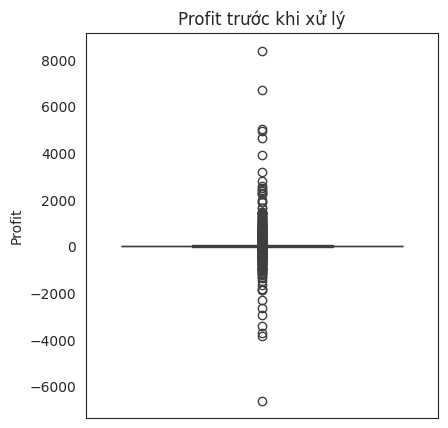

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Profit'])
plt.title("Profit trước khi xử lý")

In [ ]:
df["Profit"] = df["Profit"].clip(nguong_duoi, nguong_tren)

Text(0.5, 1.0, 'Profit sau khi xử lý')

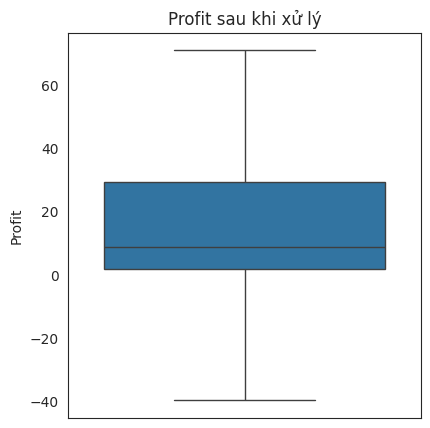

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Profit'])
plt.title("Profit sau khi xử lý")

In [ ]:
# Xoá các cột không cần thiết
cols_drop = [
    'Row ID', 'Order ID','Customer ID', 'Customer Name','City',
    'Product ID', 'Product Name', 'Postal Code', 'Country']
df = df.drop(columns=cols_drop, errors='ignore')

In [ ]:
# Mã hóa
categorical_cols = ["Category", "Sub-Category", "Segment", "Ship Mode", "Region","State"]

def target_encode(df, col, target, smoothing=5):
    global_mean = df[target].mean()

    stats = df.groupby(col)[target].agg(['mean', 'count'])
    stats['smoothed'] = (stats['count'] * stats['mean'] + smoothing * global_mean) / (stats['count'] + smoothing)

    return df[col].map(stats['smoothed'])

# Áp dụng Target Encoding
for col in categorical_cols:
    df[f"TE_{col.replace(' ', '_')}"] = target_encode(df, col, "Profit")

# Xóa các cột gốc
df = df.drop(columns=categorical_cols)

Trước khi chia tệ dữ liệu ta sẽ xóa các cột không cần thiết

In [ ]:
cols_drop = ['Order Date','Ship Date','Month','State_Code']
df = df.drop(columns=cols_drop)

In [ ]:
df.to_csv('df_cleaned.csv',index = False);

In [ ]:
# from google.colab import files
# files.download('df_cleaned.csv')

# Xây dựng mô hình hồi quy tuyến tính

In [ ]:
y = df['Profit']
X = df.drop(columns=['Profit'])

In [ ]:
X_num = X.select_dtypes(include=[np.number])

def calc_vif(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_before = calc_vif(X_num)
print("VIF ban đầu:")
print(vif_before.sort_values("VIF", ascending=False))

VIF ban đầu:
            Feature          VIF
3              Year  1162.744803
8        TE_Segment   621.769732
9      TE_Ship_Mode   418.106113
10        TE_Region    21.462413
6       TE_Category    14.027635
4           Quarter     8.435584
7   TE_Sub-Category     8.324419
5     Shipping Days     7.730638
11         TE_State     6.857804
2          Discount     4.824196
1          Quantity     4.546619
0             Sales     1.970434


In [ ]:
cols_remove = ['Year', 'TE_Ship_Mode', 'TE_Segment', 'TE_Region', 'Shipping Days']
X = X.drop(columns=cols_remove)

In [ ]:
X_num = X.select_dtypes(include=[np.number])
vif_after = calc_vif(X_num)

print("\nVIF sau khi loại biến:")
print(vif_after.sort_values("VIF", ascending=False))


VIF sau khi loại biến:
           Feature        VIF
4      TE_Category  13.186788
5  TE_Sub-Category   8.019322
3          Quarter   6.356012
6         TE_State   4.208603
1         Quantity   4.041198
2         Discount   3.172670
0            Sales   1.936340


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
linear_results = []

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=seed
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    linear_results.append([seed, mse, rmse, r2])

linear_df = pd.DataFrame(
    linear_results,
    columns=['random_state', 'MSE', 'RMSE', 'R2']
)

linear_df

print(linear_df)
print("\n--- GIÁ TRỊ TRUNG BÌNH ---")
print(linear_df[['MSE','RMSE','R2']].mean())

   random_state         MSE       RMSE        R2
0             0  418.154393  20.448824  0.513335
1             1  433.302248  20.815913  0.499895
2             2  408.801324  20.218836  0.532245
3             3  437.576120  20.918320  0.503593
4             4  465.464019  21.574615  0.486342
5             5  417.365945  20.429536  0.513636
6             6  426.866914  20.660758  0.500732
7             7  420.340436  20.502206  0.504622
8             8  417.310904  20.428189  0.507882
9             9  442.953604  21.046463  0.490278

--- GIÁ TRỊ TRUNG BÌNH ---
MSE     428.813591
RMSE     20.704366
R2        0.505256
dtype: float64


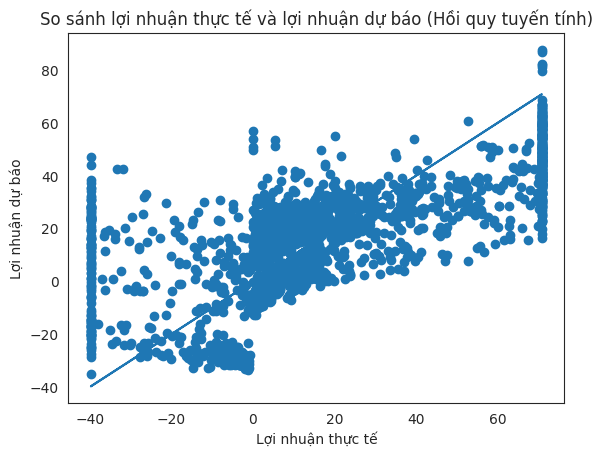

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test)
plt.xlabel("Lợi nhuận thực tế")
plt.ylabel("Lợi nhuận dự báo")
plt.title("So sánh lợi nhuận thực tế và lợi nhuận dự báo (Hồi quy tuyến tính)")
plt.show()

Mô hình rừng ngẫu nhiên

In [ ]:
# Khởi tạo mô hình Rừng ngẫu nhiên
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Dự đoán trên tập dữ liệu kiểm tra
y_pred_rf = rf_model.predict(X_test)

In [ ]:
rf_results = []

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=seed,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    rf_results.append([seed, mse, rmse, r2])

rf_df = pd.DataFrame(
    rf_results,
    columns=['random_state', 'MSE', 'RMSE', 'R2']
)

print(rf_df)

print("\n--- GIÁ TRỊ TRUNG BÌNH ---")
print(rf_df[['MSE','RMSE','R2']].mean())


   random_state         MSE       RMSE        R2
0             0  161.080833  12.691762  0.812528
1             1  150.799308  12.280037  0.825952
2             2  154.130011  12.414911  0.823643
3             3  145.237081  12.051435  0.835236
4             4  166.660126  12.909691  0.816084
5             5  149.678700  12.234325  0.825577
6             6  152.878418  12.364401  0.821192
7             7  134.476523  11.596401  0.841517
8             8  158.462837  12.588202  0.813131
9             9  172.862373  13.147714  0.801081

--- GIÁ TRỊ TRUNG BÌNH ---
MSE     154.626621
RMSE     12.427888
R2        0.821594
dtype: float64


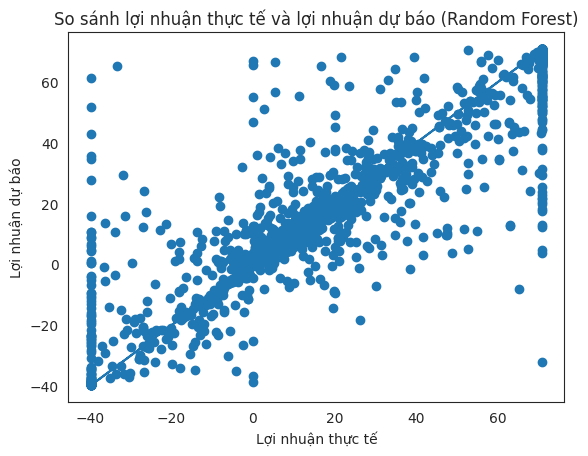

In [ ]:
y_pred_rf = rf.predict(X_test)   # X_test_rf = X_test của RF đã được thay bằng X_test

plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.plot(y_test, y_test)
plt.xlabel("Lợi nhuận thực tế")
plt.ylabel("Lợi nhuận dự báo")
plt.title("So sánh lợi nhuận thực tế và lợi nhuận dự báo (Random Forest)")
plt.show()

In [ ]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance.head(10))

Sales              0.444004
Discount           0.370507
TE_Sub-Category    0.103221
TE_State           0.029065
Quantity           0.025803
TE_Category        0.019406
Quarter            0.007994
dtype: float64
